In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [7]:
def prime_factors(n):
    facs = []
    while n % 2 == 0: # start finding factors of 2
        facs.append(2)
        n /= 2
        
    # now n is odd -> step numbers by 2 ( i += 2)
    for i in range (3, int(np.sqrt(n)) + 1, 2):
        while n % i == 0:
            facs.append(i)
            n /= i
            
    # final condition: if n is prime (only happens now if it's greater than 2)
    if n > 2:
        facs.append(n)
        
    return facs

count_instances = lambda l: [sorted(set(l)), [l.count(i) for i in sorted(set(l))]]

prime_factors(27)
    

[3, 3, 3]

# Distribution of prime factors

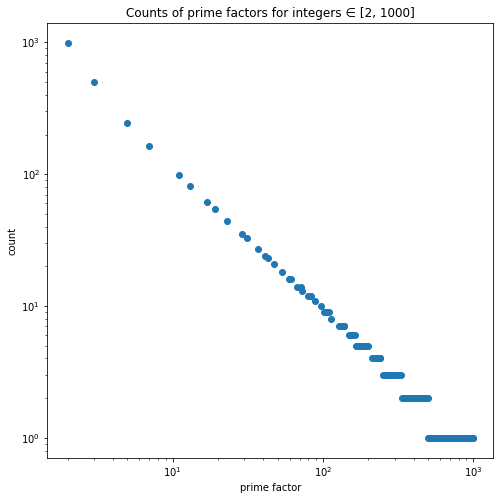

In [78]:
plt.figure(figsize=(8,8))
_n = 1000
cmap = LinearSegmentedColormap.from_list('mycmap', ['#111d6c', '#e03694'])
color = cmap(np.linspace(0, 1,_n))
all_counts = []

[all_counts.extend(prime_factors(i)) for i in range(2,_n)]
plt.scatter(*count_instances(all_counts))
plt.yscale('log'); plt.xscale('log')
plt.xlabel('prime factor');    plt.ylabel('count');    plt.title(f'Counts of prime factors for integers ∈ [2, {_n}]')
plt.show()

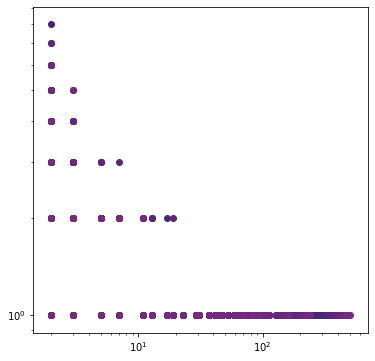

In [74]:
_n = 500
plt.figure(figsize=(6,6))
for i in range(2,_n):
    #plt.subplot(10,10,i-1)
    plt.scatter(*count_instances(prime_factors(i)), color=color[i],marker='o')
    plt.yscale('log'); plt.xscale('log')

# Distribution of # of prime factors

by looking at np.argmax(y), also might be interesting to see how the max fits in contrast to other lengths 

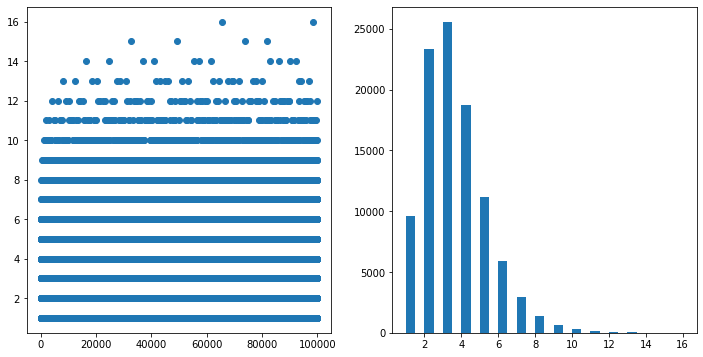

In [154]:
_n = 100000
y = [len(prime_factors(i)) for i in range(2,_n)]
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(range(2,_n), y)
plt.subplot(1,2,2)
plt.hist(y,bins=30);    plt.show()

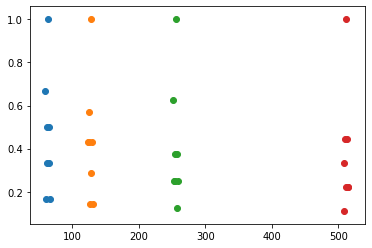

In [153]:
history = []
for n in range(100,1100,100):
    y = [len(prime_factors(i)) for i in range(2,n)]
    m_i = np.argmax(y); d =4
    x = range(2,n)
    pos = (np.array(x)[m_i-d:m_i+d], np.array(y)[m_i-d:m_i+d]/max(y))
    if (list(pos[0]), list(pos[1])) not in history:
        plt.scatter(*pos)
    history.append((list(pos[0]), list(pos[1])))

# <span style="color:orange">Monte Carlo chain where probs are inverse of primes</span>

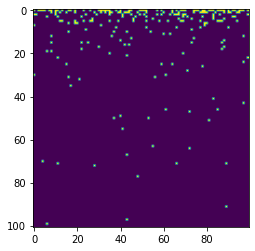

In [19]:
import json
import numpy as np
import matplotlib.pyplot as plt


with open('data/prime10k.json','r') as f:
    primes = json.load(f)
    
fires = np.array([ [int(np.random.random() < 1/p) for p in primes[:101]] 
                    for i in range(100) ])
        
        
plt.imshow(fires.T)